In [14]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
font = {
        'size'   : 22}
rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


d:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['log', 'rc', 'sqrt', 'arcsin', 'arccos', '__version__', 'show_config', 'arctanh', 'log10', 'fft', 'log2', 'power', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [15]:
from scipy import *
from scipy import optimize
from wavefunction import *
from wavefunction.wavefunction1d import *
from wavefunction.utils import *
from AC_qubit_func import U_ho

In [16]:
params = {'EJ':6,'EC':6.7,'EL':0.04,'ECL':5,'Delta_EJ':0.}
params = {'EJ':6,'EC':1.5*20,'EL':0.008*20,'ECL':0.32*20,'Delta_EJ':0}

In [17]:
args = {'Phi_min':-8*pi,'Phi_max':8*pi,'Qdim':7,'gridsize':50}

In [18]:
E_J =params['EJ']
E_C = params['EC']
E_L = params['EL']
E_CL = params['ECL']
Delta_E_J =params['Delta_EJ']

wp = (np.sqrt(2*E_J*E_CL))
g = 4*np.sqrt(2*E_J/E_CL)
# E_L=0.8 * np.sqrt(g) * np.exp(-g) * wp/(2*np.pi**2)/10

In [19]:
phi_min = args['Phi_min']
phi_max = args['Phi_max']
gridsize=args['gridsize'] # grid size along coordinate phi
Q_dim=args['Qdim']

In [20]:
Q_list = np.arange(Q_dim)-3
ng = 0.5
phi0 = 2*np.pi*0.

In [21]:
Q = np.diag(Q_list).astype(np.complex)
    
Q_dim = np.size(Q_list)
Q_ = np.zeros((Q_dim,Q_dim)).astype(np.complex)
for m in range(0,Q_dim):
    for n in range(0,Q_dim):
        Q_[m,n]=mod_kron(m+1,n)+mod_kron(m-1,n)

Q_p = np.zeros((Q_dim,Q_dim)).astype(np.complex)
for m in range(0,Q_dim):
    for n in range(0,Q_dim):
        Q_p[m,n]=-1j*mod_kron(m+1,n)+1j*mod_kron(m-1,n)


# charging energy of CPB
H0 = 4* E_C * np.kron( (np.diag((Q_list-ng)**2)), np.diag(ones(gridsize+1)) )

x0 = phi0
# potential energy of superinductor
x = linspace(phi_min,phi_max,gridsize+1)
u = assemble_u_potential(U_ho, x, {'k': E_L, 'x0': x0})
V = np.kron(np.diag(ones(Q_dim)),assemble_V(u))

# kinetic energy of superinductor
K = np.kron (np.diag(ones(Q_dim).astype(np.complex)),assemble_K(-4*E_CL,x))

#
H = K + V

# symmetric CPB
u = -E_J * np.cos(x/2)
V = np.kron(Q_, assemble_V(u)) 
H +=V

# add asymmetry to EJ
if True:
    u = - 1./2 *Delta_E_J* np.sin(x/2)
    V = np.kron(Q_p,assemble_V(u)) 
    H += V 

In [22]:
vals, vecs = np.linalg.eig(H+H0)
idx = np.real(vals).argsort()
evals = vals[idx]
evecs = vecs.T[idx]

([], <a list of 0 Text xticklabel objects>)

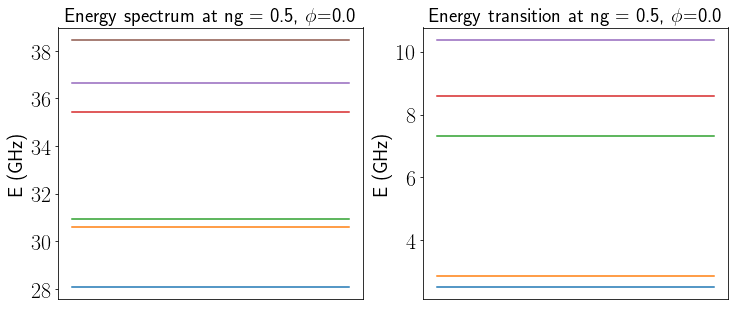

In [23]:
max_E_level = 6
plt.subplots(1,2,figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Energy spectrum at ng = %.1f, $\phi$=%.1f' \
          %(ng,phi0/2/np.pi),fontsize=20)
for i in np.arange(max_E_level):
    plt.plot(np.arange(2),evals[i].real*np.ones(2),'-')
plt.ylabel('E (GHz)',fontsize=20)
plt.xticks([])

plt.subplot(1,2,2)
plt.title('Energy transition at ng = %.1f, $\phi$=%.1f' \
          %(ng,phi0/2/np.pi),fontsize=20)
for i in np.arange(1,max_E_level):
    plt.plot(np.arange(2),(evals[i].real-evals[0].real)*np.ones(2),'-')
plt.ylabel('E (GHz)',fontsize=20)
plt.xticks([])

Text(0.5,0,'$\\Phi/(2 \\pi \\Phi_0)$')

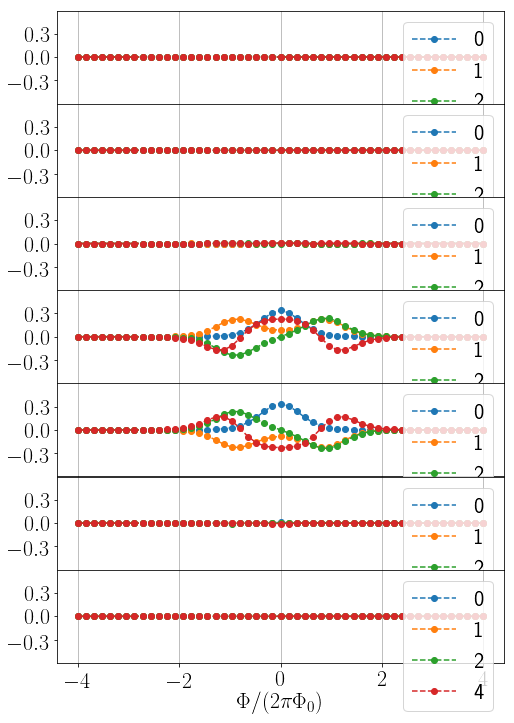

In [24]:
plt.subplots(Q_dim,1,figsize=(8,12))
plt.subplots_adjust(hspace = .001)

for j in np.arange(Q_dim):
    plt.subplot(Q_dim,1,j+1)
    
    for i in [0,1,2,4]:
        y = evecs[i].real
        y = y.reshape(Q_dim,gridsize+1)
        plt.plot(x/2/np.pi,y[j,:],'o--',label='%d'% i)
        
    plt.ylim([-0.6,0.6])
    plt.yticks([-0.3,0,0.3])
    plt.legend()
    plt.grid(axis='x')
plt.xlabel('$\Phi/(2 \pi \Phi_0)$',)

# plt.plot(np.ones(10)*0.5,np.linspace(-0.,0.5,10))

# u = assemble_u_potential(U_ho, x, {'k': E_L, 'x0': x0})
# u = u - E_J * np.cos(x/2)
# plt.plot(xp,u/u.max()/3)

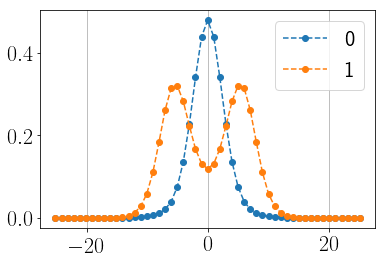

In [25]:
for i in [0,1]:
    y = evecs[i].real
    y = y**2
    y = np.sum(y.reshape(Q_dim,gridsize+1),0)
    y = y/np.sum(y)
    y = np.sqrt(y)
    plt.plot(x,y,'o--',label='%d'%i)
plt.legend()
plt.grid(axis='x')
# plt.plot(np.ones(10)*0.5,np.linspace(-0.,0.5,10))

u = assemble_u_potential(U_ho, x, {'k': E_L, 'x0': x0})
u = u - E_J * np.cos(x/2)
# plt.plot(xp,u)

In [26]:
wp = (np.sqrt(2*E_J*E_CL))
print('wp %.2f GHz' % wp)
g = 4*np.sqrt(2*E_J/E_CL)
print('E_dps %.5f GHz' % (0.8 * np.sqrt(g) * np.exp(-g) * wp))
print('EL %f GHz' % E_L)

wp 8.76 GHz
E_dps 0.06860 GHz
EL 0.160000 GHz
